In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df1 = pd.read_csv('data/df1.csv')
df2 = pd.read_csv('data/df2.csv')
df = pd.concat([df1,df2],0)
df = df[['name','album','artist','id','release_date','popularity','danceability','energy','valence','loudness']]

FileNotFoundError: [Errno 2] File data/df1.csv does not exist: 'data/df1.csv'

In [53]:
df2 = pd.read_pickle('Created_Features\Rahul_Chill.pkl')


In [18]:
df = pd.read_pickle('Created_Features\Jazz.pkl')


In [35]:
df = df[['name','album','artist','id','release_date','popularity','danceability','energy','valence','loudness']]

In [36]:
df

,name,album,artist,id,release_date,popularity,danceability,energy,valence,loudness
0,R U Mine?,AM,Arctic Monkeys,2AT8iROs4FQueDv2c8q2KE,2013-09-09,81,0.288,0.758,0.619,-5.692
1,Arabella,AM,Arctic Monkeys,7nzsY8vlnKdvGOEE0rjAXZ,2013-09-09,77,0.579,0.558,0.506,-6.986
2,Free Bird,(Pronounced 'Leh-'Nérd 'Skin-'Nérd),Lynyrd Skynyrd,4qsAYBCJnu2OkTKUVbbOF1,1973,66,0.279,0.852,0.438,-7.838
3,Ophelia,Cleopatra,The Lumineers,5NORWMFC27ywGSZxi8uquP,2016-04-08,81,0.664,0.573,0.566,-6.519
4,Here Comes The Sun - Remastered,Abbey Road (Remastered),The Beatles,45yEy5WJywhJ3sDI28ajTm,1969-09-26,1,0.557,0.540,0.394,-10.484
...,...,...,...,...,...,...,...,...,...,...
63,Love Chained,Shadows,Cannons,0CPhk8i6NPMiUr9c0PP41t,2019-07-12,48,0.388,0.637,0.272,-4.870
64,Baby,Shadows,Cannons,7bVQ4RzPfjoxu1T5GPGrTc,2019-07-12,49,0.598,0.679,0.473,-6.997
65,Love on the Ground,Shadows,Cannons,7AWcvO4YbXqqeglNFgxH5l,2019-07-12,48,0.697,0.729,0.965,-6.856
66,Fire for You,Shadows,Cannons,4o0LyB69tylqDG6eTGhmig,2019-07-12,74,0.737,0.678,0.698,-7.011


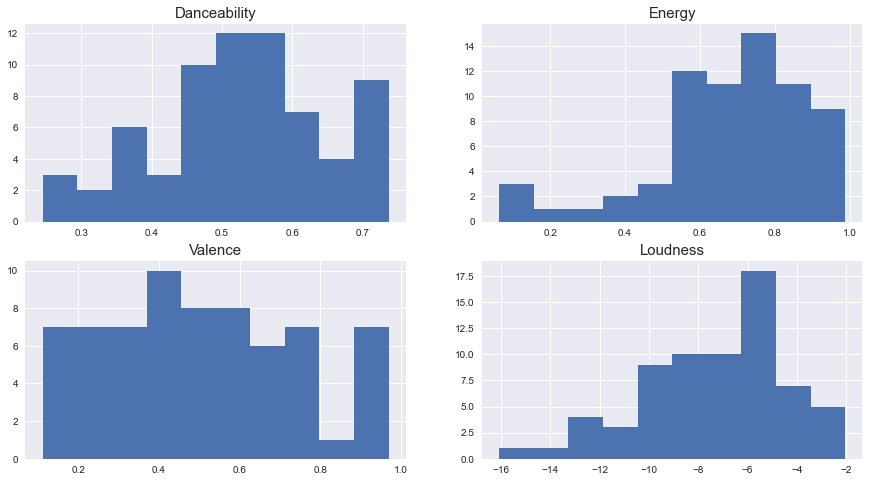

In [37]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

axes[0,0].hist(df['danceability'])
axes[0,0].set_title('Danceability',fontsize=15)
axes[0,1].hist(df['energy'])
axes[0,1].set_title('Energy',fontsize=15)
axes[1,0].hist(df['valence'])
axes[1,0].set_title('Valence',fontsize=15)
axes[1,1].hist(df['loudness'])
axes[1,1].set_title('Loudness',fontsize=15)
plt.show()

In [38]:
df.describe()

,popularity,danceability,energy,valence,loudness
count,68.000000,68.000000,68.000000,68.000000,68.000000
mean,65.000000,0.526853,0.686572,0.501882,-7.245309
std,22.463901,0.120847,0.204861,0.236810,2.789146
min,0.000000,0.245000,0.063900,0.112000,-16.066000
25%,57.000000,0.446750,0.572750,0.311750,-9.100500
50%,70.000000,0.535500,0.724000,0.474500,-6.991500
75%,80.250000,0.598250,0.836500,0.663000,-5.313250
max,98.000000,0.737000,0.988000,0.969000,-2.042000


In [39]:
col_features = df.columns[6:]
X = MinMaxScaler().fit_transform(df[col_features])

In [40]:
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)

In [41]:
df['kmeans'] = kmeans.labels_

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

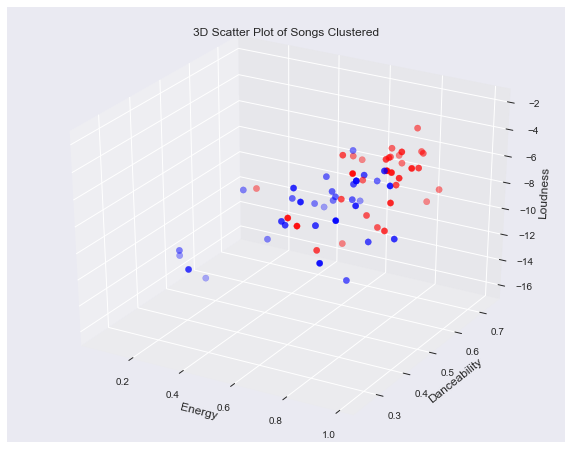

In [42]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['energy']
y = df['danceability']
z = df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")



In [43]:
df.groupby(['kmeans']).mean()

,popularity,danceability,energy,valence,loudness
kmeans,,,,,
0,62.885714,0.495486,0.607340,0.318457,-8.250886
1,67.242424,0.560121,0.770606,0.696424,-6.178788


In [44]:
df[df['kmeans']==0]

,name,album,artist,id,release_date,popularity,danceability,energy,valence,loudness,kmeans
1,Arabella,AM,Arctic Monkeys,7nzsY8vlnKdvGOEE0rjAXZ,2013-09-09,77,0.579,0.5580,0.506,-6.986,0
2,Free Bird,(Pronounced 'Leh-'Nérd 'Skin-'Nérd),Lynyrd Skynyrd,4qsAYBCJnu2OkTKUVbbOF1,1973,66,0.279,0.8520,0.438,-7.838,0
4,Here Comes The Sun - Remastered,Abbey Road (Remastered),The Beatles,45yEy5WJywhJ3sDI28ajTm,1969-09-26,1,0.557,0.5400,0.394,-10.484,0
5,Wonderwall,(What's the Story) Morning Glory?,Oasis,79RUMZfMNMpqZnswovvTqv,1995-10-02,3,0.412,0.8440,0.459,-5.613,0
11,In The End,Wretched and Divine: The Story Of The Wild Ones,Black Veil Brides,1RTYixE1DD3g3upEpmCJpa,2012-01-01,65,0.442,0.9390,0.270,-4.180,0
15,Numb,Meteora,Linkin Park,2nLtzopw4rPReszdYBJU6h,2003-03-24,83,0.496,0.8630,0.243,-4.153,0
17,Dance of Death - 2015 Remaster,Dance of Death (2015 Remaster),Iron Maiden,4YsgFGkP1KeSFDWfZqVioX,2003,55,0.311,0.8760,0.296,-5.115,0
20,Blinding Lights,After Hours,The Weeknd,0VjIjW4GlUZAMYd2vXMi3b,2020-03-20,97,0.514,0.7300,0.334,-5.934,0
21,Faith,After Hours,The Weeknd,3orEOtd8CPL8GFlpRpKuoE,2020-03-20,72,0.375,0.6050,0.128,-7.268,0
22,Heartless,After Hours,The Weeknd,6bnF93Rx87YqUBLSgjiMU8,2020-03-20,82,0.537,0.7460,0.252,-5.507,0


In [45]:
df[df['kmeans']==1]

,name,album,artist,id,release_date,popularity,danceability,energy,valence,loudness,kmeans
0,R U Mine?,AM,Arctic Monkeys,2AT8iROs4FQueDv2c8q2KE,2013-09-09,81,0.288,0.758,0.619,-5.692,1
3,Ophelia,Cleopatra,The Lumineers,5NORWMFC27ywGSZxi8uquP,2016-04-08,81,0.664,0.573,0.566,-6.519,1
6,Anastastia (feat. Myles Kennedy and The Conspi...,Apocalyptic Love,Slash,3uxd8TxxPn7ImD37xPYa3n,2012-05-18,40,0.446,0.938,0.476,-5.475,1
7,Sweet Home Alabama,Second Helping,Lynyrd Skynyrd,7e89621JPkKaeDSTQ3avtg,1974-04-15,84,0.596,0.605,0.886,-12.145,1
8,Highway to Hell,Highway to Hell,AC/DC,2zYzyRzz6pRmhPzyfMEC8s,1979-07-27,85,0.574,0.913,0.423,-4.793,1
9,Back In Black,Back In Black,AC/DC,08mG3Y1vljYA6bvDt4Wqkj,1980-07-25,86,0.310,0.700,0.763,-5.678,1
10,Fourth Of July,American Beauty/American Psycho,Fall Out Boy,3CBWtVFHhxeaHVm4VverBG,2015-01-16,0,0.486,0.973,0.542,-3.373,1
12,Centuries,American Beauty/American Psycho,Fall Out Boy,0yhPEz5KxlDwckGJaMlZqM,2015-01-16,0,0.383,0.861,0.480,-2.816,1
13,Basket Case,Dookie,Green Day,6L89mwZXSOwYl76YXfX13s,1994-02-01,81,0.442,0.943,0.781,-3.205,1
14,American Idiot,American Idiot,Green Day,6nTiIhLmQ3FWhvrGafw2zj,2004-09-21,81,0.380,0.988,0.769,-2.042,1


In [54]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
music_feature = df2[['popularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','length']]
music_feature.loc[:]=min_max_scaler.fit_transform(music_feature.loc[:])

C:\Python\Python37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


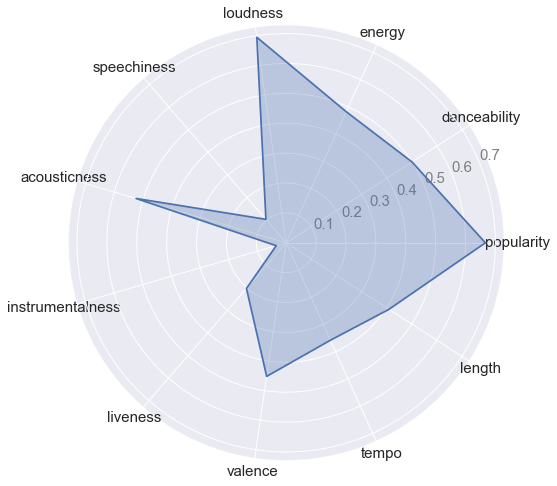

In [55]:
# plot size
pi=3.14
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_feature.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_feature.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Discovery Weekly Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

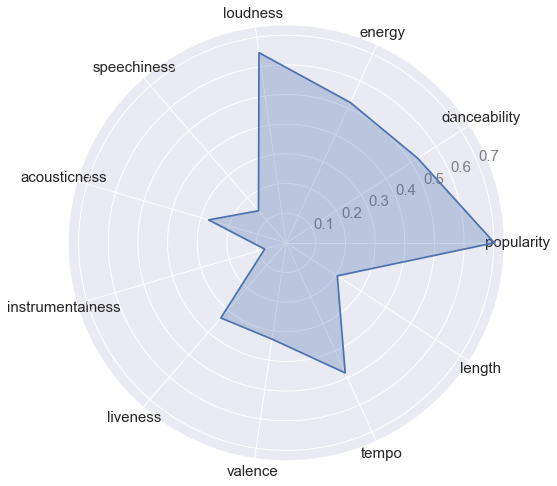

In [44]:
# plot size
pi=3.14
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_feature.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_feature.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Discovery Weekly Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

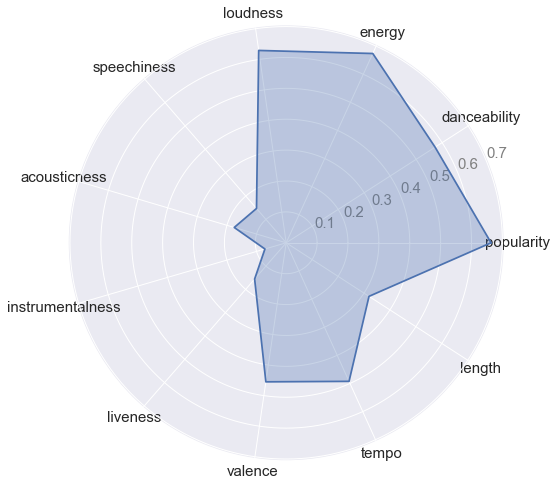

In [38]:
# plot size
pi=3.14
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_feature.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_feature.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Discovery Weekly Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

In [89]:
cluster_0 = df[df['kmeans']==0]
cluster_1  = df[df['kmeans']==1]

In [94]:
cluster_0.to_csv("data/cluster0.csv",index=False)
cluster_1.to_csv("data/cluster1.csv",index=False)
df.to_csv("data/df.csv",index=False)